In [206]:
# import numpy as np
# import ldpc.codes  # Import the LDPC codes module
# from ldpc import BpDecoder

# H_matrix_3rep = ldpc.codes.rep_code(3)
# n = H_matrix_3rep.shape[1]  # Number of qubits

# bpd = BpDecoder(
#     H_matrix_3rep,  # the parity check matrix
#     error_rate=0.1,
#     max_iter=1,
#     bp_method="minimum_sum",  # the BP method
#     ms_scaling_factor=0,  # min sum scaling factor. If set to zero the variable scaling factor method is used
# )

In [207]:
# error = np.array([0,1,0])
# syndrome = H_matrix_3rep@ error % 2
# decoding = bpd.decode(syndrome)

# print("Syndrome:", syndrome)
# print("Decoded error pattern:", decoding)
# print("log probability ratios: ",bpd.log_prob_ratios)


In [249]:
import numpy as np
from multiple_stabilizers import get_condition_indices, generate_parity_check_matrix


H, L = 8, 17
m = 3
stabilizer_shape = np.array([[0, 1, 0],
                            [0, 1, 0],
                            [1, 0, 1]])

condition_indices = get_condition_indices(stabilizer_shape)
print("Condition indices (dx, dy):", condition_indices)

H_matrix = generate_parity_check_matrix(H, L, m, condition_indices)

print("Generated Parity-Check Matrix H:")
# print H index of 1
# for i in range(H_matrix.shape[0]):
#     print(f'\n${i} parity-check: ', end='')
#     for j in range(H_matrix.shape[1]):
#         if H_matrix[i][j] == 1:
#             print(f"({i}, {j})", end=' ')
print("\nShape of H matrix:", H_matrix.shape)
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# print(H_matrix)

Stabilizer shape:
[[0 1 0]
 [0 1 0]
 [1 0 1]]
Rows: 3, Cols: 3
Condition indices (dx, dy): [(1, 0), (2, -1), (2, 1)]
Generating H matrix of size 102 x 136
Generated Parity-Check Matrix H:

Shape of H matrix: (102, 136)


In [209]:
import numpy as np
from ldpc import bposd_decoder

error_rate = 0.1

bpd=bposd_decoder(
    H_matrix,#the parity check matrix
    error_rate=error_rate,
    channel_probs=[None], #assign error_rate to each qubit. This will override "error_rate" input variable
    # max_iter=surface_code.N, #the maximum number of iterations for BP)
    bp_method="ms",
    ms_scaling_factor=0, #min sum scaling factor. If set to zero the variable scaling factor method is used
    osd_method="OSD_CS", #the OSD method. Choose from:  1) "osd_e", "osd_cs", "osd0"
    osd_order=7 #the osd search depth
    )

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ldpc/_legacy_ldpc_v1/_legacy_bposd_decoder.py:45: UserWarning: This is the old syntax for the `bposd_decoder` from `ldpc v1`. Use the `BpOsdDecoder` class from `ldpc v2` for additional features.
  warnings.warn(


In [210]:
from multiple_stabilizers import fill_Z_with_stabilizer_shape 
input_row = np.random.randint(0, 2, size=(m-1, L))
input_row = np.zeros((m-1, L), dtype=int)
input_row[1][8] = 1
print("Input row:")
print(input_row)

Z = fill_Z_with_stabilizer_shape(input_row, H, L, m, [condition_indices], same_shape=True)
print("Generated Z matrix:")
print(Z)
print("Shape of Z matrix:", Z.shape)

Z = Z.flatten()[::-1]  # flatten and reverse
print("Codeword: ")
print(Z)
print("Shape of codeword:", Z.shape)

# make error with probability error_rate for each bit
error = (np.random.rand(len(Z)) < error_rate).astype(int)

print("Error vector:")
print(error)

# weight of error
print("Weight of error:", np.sum(error))

received = (Z + error) % 2

# syndrome calculation
syndrome = np.mod(H_matrix @ received, 2)
print("Syndrome:")
print(syndrome)
print("Shape of syndrome:", syndrome.shape)

decoding = bpd.decode(syndrome)

print("Real Error")
print(error)
print("BP+OSD Decoding (expected error):")
print(decoding)
#Decoding is successful if the residual error commutes with the logical operators
residual_error=(decoding + error) %2
print("Residual Error:")
print(residual_error)
logical_error = (Z @ residual_error%2).any()
print("Logical error detected:", logical_error)

Input row:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]
condition offsets list: [[(1, 0), (2, -1), (2, 1)]]
Generated Z matrix:
[[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]
Shape of Z matrix: (8, 17)
Codeword: 
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
Shape of codeword: (136,)
Error vector:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

In [270]:
stabilizer_shape = np.array([[0, 1, 0],
                             [1, 1, 1],
                             [0, 0, 0]])

m = np.count_nonzero(np.any(stabilizer_shape, axis=1))

print("number of non-zero rows:", m)

number of non-zero rows: 2


Stabilizer shape:
[[0 1 0]
 [0 1 0]
 [1 0 1]]
Rows: 3, Cols: 3
Generating H matrix of size 102 x 136
Code parameters: n=136, k=34, d=17
condition offsets list: [[(1, 0), (2, -1), (2, 1)]]
codeword: •*•|•*•|*•*:
 [[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
Stabilizer shape:
[[0 1 0]
 [1 0 0]
 [1 1 0]]
Rows: 3, Cols: 3
Generating H matrix of size 102 x 136
Code parameters: n=136, k=34, d=8
condition offsets list: [[(1, -1), (2, -1), (2, 0)]]
codeword: •*•|*••|**•:
 [[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 

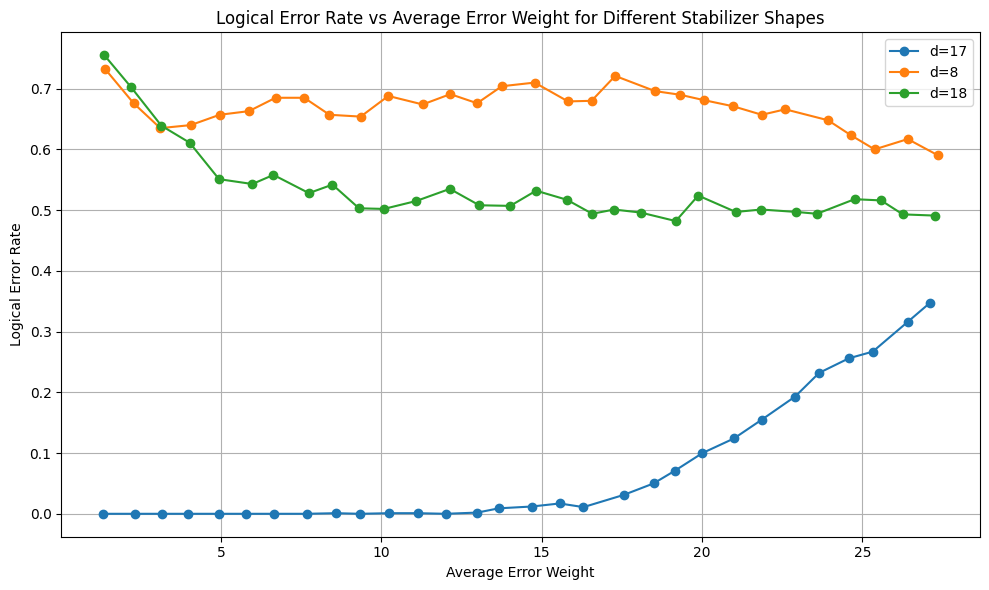

In [284]:
import ldpc.code_util
import numpy as np
import matplotlib.pyplot as plt
from ldpc import BpOsdDecoder
from multiple_stabilizers import get_condition_indices, generate_parity_check_matrix, fill_Z_with_stabilizer_shape

def simulate_logical_error_rate_vs_weight(Z, H_matrix, bpd, error_rates, num_trials=1000, verbose=False):
    avg_error_weights = []
    logical_error_rates = []

    for error_rate in error_rates:
        logical_errors = 0
        total_error_weight = 0

        for _ in range(num_trials):
            error = (np.random.rand(len(Z)) < error_rate).astype(int)
            total_error_weight += np.sum(error)

            received = (Z + error) % 2
            syndrome = np.mod(H_matrix @ received, 2)
            decoding = bpd.decode(syndrome)
            residual_error = (decoding + error) % 2
            logical_error = (Z @ residual_error % 2).any()

            if logical_error:
                logical_errors += 1

        logical_error_rate = logical_errors / num_trials
        avg_error_weight = total_error_weight / num_trials

        logical_error_rates.append(logical_error_rate)
        avg_error_weights.append(avg_error_weight)

        if verbose:
            print(f"error_rate={error_rate:.3f} → logical_error_rate={logical_error_rate:.8f}, avg_weight={avg_error_weight:.2f}")

    return avg_error_weights, logical_error_rates



# Different stabilizer shapes to compare
stabilizer_shapes = {
    # "•*•|***|•••":  np.array([[0, 1, 0],
    #                           [1, 1, 1],
    #                           [0, 0, 0]]),
    "•*•|•*•|*•*":  np.array([[0, 1, 0],
                              [0, 1, 0],
                              [1, 0, 1]]),
    "•*•|*••|**•":  np.array([[0, 1, 0],
                              [1, 0, 0],
                              [1, 1, 0]]),
    "•*•|**•|••*":  np.array([[0, 1, 0],
                              [1, 1, 0],
                              [0, 0, 1]]),
}



# X-axis: bit error rates
error_rates = np.linspace(0.01, 0.2, 30)

plt.figure(figsize=(10, 6))

for label, stabilizer_shape in stabilizer_shapes.items():
    # m is the number of nonzero rows in the stabilizer shape
    m = np.count_nonzero(np.any(stabilizer_shape, axis=1))
    # Grid parameters
    H, L = 8, 17
    input_row = np.zeros((m - 1, L), dtype=int)
    input_row[-1][-1] = 1  # Set a specific bit to 1 for testing
    
    condition_indices = get_condition_indices(stabilizer_shape)
    H_matrix = generate_parity_check_matrix(H, L, m, condition_indices)
    n, k, d = ldpc.code_util.compute_code_parameters(H_matrix)
    print(f"Code parameters: n={n}, k={k}, d={d}")
    Z_matrix = fill_Z_with_stabilizer_shape(input_row, H, L, m, [condition_indices], same_shape=True)
    print(f"codeword: {label}:\n", Z_matrix)
    Z = Z_matrix.flatten()[::-1]

    bpd = BpOsdDecoder(
        H_matrix,
        error_rate=0.1,  # Overridden by `channel_probs=[None]`
        channel_probs=[None],
        bp_method="minimum_sum",
        ms_scaling_factor=0,
        osd_method="OSD_CS",
        osd_order=7
    )

    avg_weights, logical_rates = simulate_logical_error_rate_vs_weight(Z, H_matrix, bpd, error_rates, num_trials=1000)
    plt.plot(avg_weights, logical_rates, label=f'd={d}', marker='o')

plt.title("Logical Error Rate vs Average Error Weight for Different Stabilizer Shapes")
plt.xlabel("Average Error Weight")
plt.ylabel("Logical Error Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
def simulate_logical_error_rate_vs_weight(Z, H_matrix, bpd, error_rates, num_trials=10000, verbose=True):
    """
    Simulates logical error rates for a range of physical error rates,
    and computes actual average error weights.

    Parameters:
        Z (np.ndarray): Codeword vector (flattened)
        H_matrix (np.ndarray): Parity-check matrix
        bpd: Belief Propagation + OSD decoder object (e.g., from ldpc)
        error_rates (list or np.ndarray): List of bit-flip probabilities to test
        num_trials (int): Number of trials per error rate
        verbose (bool): Whether to print progress

    Returns:
        avg_error_weights (list of float): Average number of bit flips per trial
        logical_error_rates (list of float): Fraction of trials with logical errors
    """
    avg_error_weights = []
    logical_error_rates = []

    for error_rate in error_rates:
        logical_errors = 0
        total_error_weight = 0

        for _ in range(num_trials):
            error = (np.random.rand(len(Z)) < error_rate).astype(int)
            total_error_weight += np.sum(error)

            received = (Z + error) % 2
            syndrome = np.mod(H_matrix @ received, 2)
            decoding = bpd.decode(syndrome)
            residual_error = (decoding + error) % 2
            logical_error = (Z @ residual_error % 2).any()

            if logical_error:
                logical_errors += 1

        logical_error_rate = logical_errors / num_trials
        avg_error_weight = total_error_weight / num_trials

        logical_error_rates.append(logical_error_rate)
        avg_error_weights.append(avg_error_weight)

        if verbose:
            print(f"error_rate={error_rate:.3f} → logical_error_rate={logical_error_rate:.8f}, avg_weight={avg_error_weight:.2f}")

    return avg_error_weights, logical_error_rates


error_rate=0.010 → logical_error_rate=0.00000000
error_rate=0.012 → logical_error_rate=0.00000000
error_rate=0.014 → logical_error_rate=0.00000000
error_rate=0.016 → logical_error_rate=0.00000000
error_rate=0.018 → logical_error_rate=0.00000000
error_rate=0.020 → logical_error_rate=0.00000000
error_rate=0.022 → logical_error_rate=0.00000000
error_rate=0.023 → logical_error_rate=0.00000000
error_rate=0.025 → logical_error_rate=0.00000000
error_rate=0.027 → logical_error_rate=0.00000000
error_rate=0.029 → logical_error_rate=0.00000000
error_rate=0.031 → logical_error_rate=0.00000000
error_rate=0.033 → logical_error_rate=0.00000000
error_rate=0.035 → logical_error_rate=0.00000000
error_rate=0.037 → logical_error_rate=0.00000000
error_rate=0.039 → logical_error_rate=0.00000000
error_rate=0.041 → logical_error_rate=0.00000000
error_rate=0.043 → logical_error_rate=0.00000000
error_rate=0.045 → logical_error_rate=0.00000000
error_rate=0.046 → logical_error_rate=0.00000000
error_rate=0.048 → l

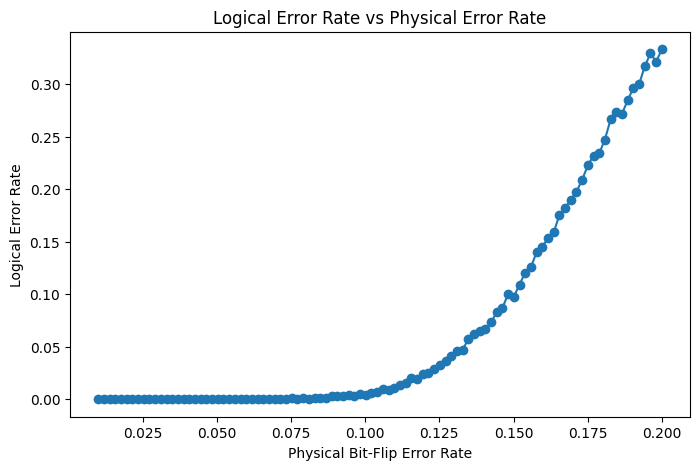

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

error_rates = np.linspace(0.01, 0.2, 100)  # e.g., [0.01, 0.03, ..., 0.2]
logical_error_rates = []

num_trials = 10000  # Use 10000 for higher accuracy, 1000 for faster results

for error_rate in error_rates:
    logical_errors = 0

    for _ in range(num_trials):
        error = (np.random.rand(len(Z)) < error_rate).astype(int)
        received = (Z + error) % 2
        syndrome = np.mod(H_matrix @ received, 2)
        decoding = bpd.decode(syndrome)
        residual_error = (decoding + error) % 2
        logical_error = (Z @ residual_error % 2).any()

        if logical_error:
            logical_errors += 1

    logical_error_rate = logical_errors / num_trials
    logical_error_rates.append(logical_error_rate)
    print(f"error_rate={error_rate:.3f} → logical_error_rate={logical_error_rate:.8f}")


In [224]:
import numpy as np
import matplotlib.pyplot as plt

error_rates = np.linspace(0.01, 0.2, 50)
logical_error_rates = []
avg_error_weights = []

num_trials = 10000

for error_rate in error_rates:
    logical_errors = 0
    total_error_weight = 0

    for _ in range(num_trials):
        error = (np.random.rand(len(Z)) < error_rate).astype(int)
        total_error_weight += np.sum(error)

        received = (Z + error) % 2
        syndrome = np.mod(H_matrix @ received, 2)
        decoding = bpd.decode(syndrome)
        residual_error = (decoding + error) % 2
        logical_error = (Z @ residual_error % 2).any()

        if logical_error:
            logical_errors += 1

    logical_error_rate = logical_errors / num_trials
    avg_error_weight = total_error_weight / num_trials

    logical_error_rates.append(logical_error_rate)
    avg_error_weights.append(avg_error_weight)

    print(f"error_rate={error_rate:.3f} → logical_error_rate={logical_error_rate:.8f}, avg_weight={avg_error_weight:.2f}")


error_rate=0.010 → logical_error_rate=0.00000000, avg_weight=1.35
error_rate=0.014 → logical_error_rate=0.00000000, avg_weight=1.88
error_rate=0.018 → logical_error_rate=0.00000000, avg_weight=2.40
error_rate=0.022 → logical_error_rate=0.00000000, avg_weight=2.96
error_rate=0.026 → logical_error_rate=0.00000000, avg_weight=3.49
error_rate=0.029 → logical_error_rate=0.00000000, avg_weight=4.03
error_rate=0.033 → logical_error_rate=0.00000000, avg_weight=4.51
error_rate=0.037 → logical_error_rate=0.00000000, avg_weight=5.06
error_rate=0.041 → logical_error_rate=0.00000000, avg_weight=5.58
error_rate=0.045 → logical_error_rate=0.00000000, avg_weight=6.13
error_rate=0.049 → logical_error_rate=0.00000000, avg_weight=6.65
error_rate=0.053 → logical_error_rate=0.00000000, avg_weight=7.16
error_rate=0.057 → logical_error_rate=0.00000000, avg_weight=7.72
error_rate=0.060 → logical_error_rate=0.00020000, avg_weight=8.24
error_rate=0.064 → logical_error_rate=0.00010000, avg_weight=8.73
error_rate

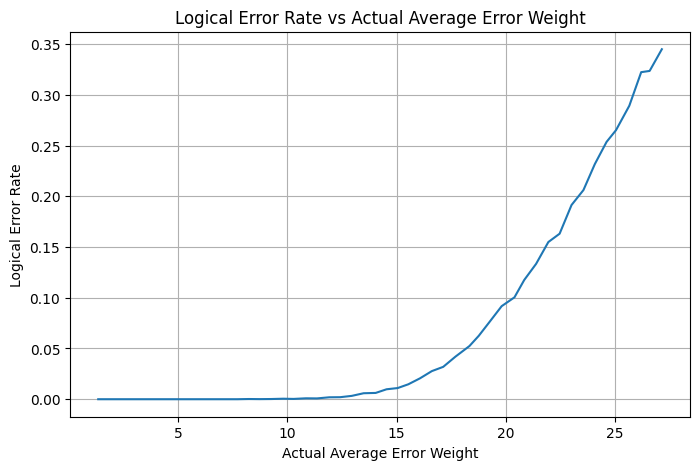

In [245]:
plt.figure(figsize=(8, 5))
plt.plot(avg_error_weights, logical_error_rates)
plt.xlabel("Actual Average Error Weight")
plt.ylabel("Logical Error Rate")
plt.title("Logical Error Rate vs Actual Average Error Weight")
plt.grid()
plt.show()


In [246]:
import numpy as np
from multiple_stabilizers import get_condition_indices, generate_parity_check_matrix


H, L = 8, 17
m = 2
stabilizer_shape = np.array([[0, 1, 0],
                            [1, 1, 1],
                            [0, 0, 0]])

condition_indices = get_condition_indices(stabilizer_shape)
print("Condition indices (dx, dy):", condition_indices)

H_matrix = generate_parity_check_matrix(H, L, m, condition_indices)

Stabilizer shape:
[[0 1 0]
 [1 1 1]
 [0 0 0]]
Rows: 3, Cols: 3
Condition indices (dx, dy): [(1, -1), (1, 0), (1, 1)]
Generating H matrix of size 119 x 136
